In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\ALFRED\Downloads\iris .xls")

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [5]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


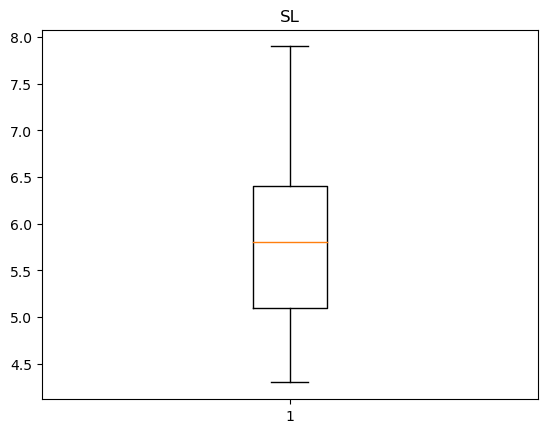

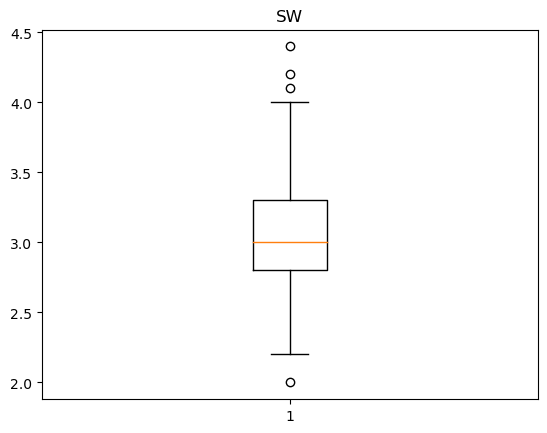

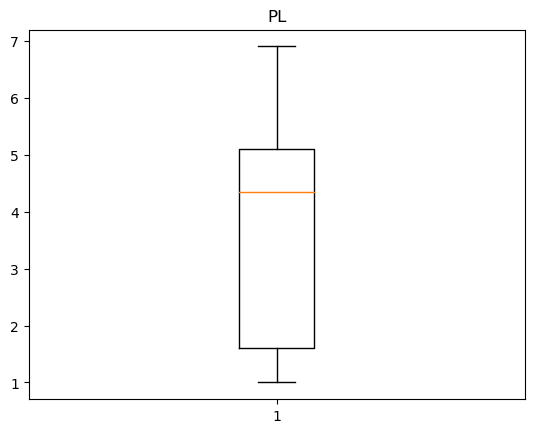

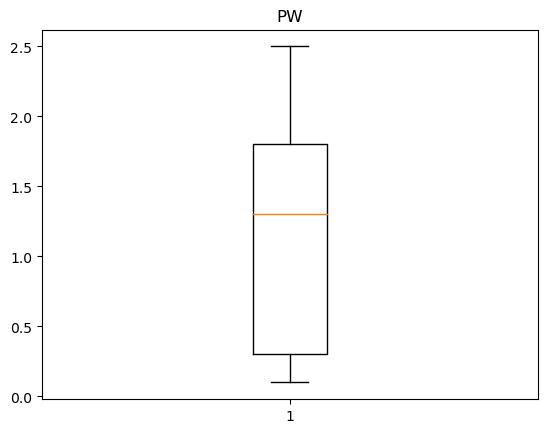

In [6]:
num_col = ['SL', 'SW', 'PL', 'PW']
for i in num_col:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [7]:
df.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [8]:
Q1 = np.percentile(df['SW'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['SW'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['SW'], 75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


C:\Users\ALFRED\AppData\Local\Temp\ipykernel_9672\1883111553.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SW'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_9672\1883111553.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['SW'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_9672\1883111553.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'highe

In [9]:
df['SW'].median()

3.0

In [10]:
IQR = Q3 - Q1
print(IQR)

0.5


In [11]:
up_lim = Q3+1.5*IQR
low_lim = Q1 - 1.5*IQR
print(up_lim)
print(low_lim)

4.05
2.05


In [12]:
outliers = []
for x in df['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [13]:
outliers

[4.4, 4.1, 4.2, 2.0]

In [14]:
ind1 = df['SW']> up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [15]:
ind2 = df['SW']< low_lim
df.loc[ind2].index

Int64Index([60], dtype='int64')

In [16]:
df.drop([15, 32, 33, 60], inplace = True)

In [17]:
df.shape

(146, 5)

In [18]:
x = df.drop(['Classification'], axis = 1)
y = df['Classification']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 100)

In [20]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred_lr = logit_model.predict(x_test)

C:\Users\ALFRED\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_lr, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_lr, average = 'weighted'))

Accuracy =  0.972972972972973
precision =  0.9749034749034748
Recall =  0.972972972972973
f1 score = 0.9728299728299727


In [22]:
confusion_matrix(y_test,y_pred_lr)

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

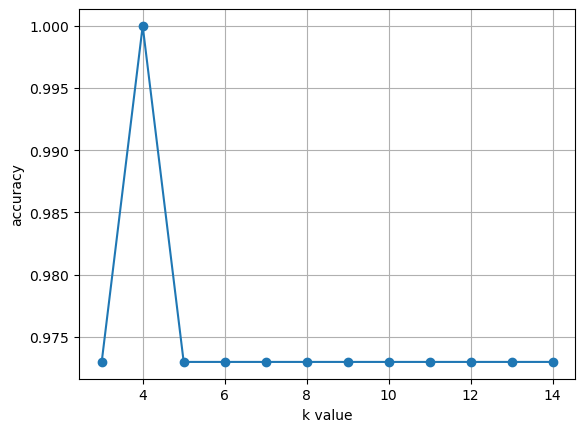

In [24]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [26]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn, average = 'weighted'))
print('Recall = ',recall_score(y_test,y_pred_knn, average = 'weighted'))
print('f1 score =',f1_score(y_test,y_pred_knn, average = 'weighted'))

Accuracy =  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0


In [27]:
confusion_matrix(y_test,y_pred_knn)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 13]], dtype=int64)

In [28]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
y_pred = svmclf.predict(x_test)

In [30]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [31]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 11  0]
 [ 0  0 13]]


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [33]:
print('Accuracy is;', accuracy_score(y_test,y_pred))

Accuracy is; 0.972972972972973


In [34]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 10  1]
 [ 0  0 13]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = rf_clf.predict(x_test)

In [37]:
print('Accuracy is;', accuracy_score(y_test,y_pred))

Accuracy is; 0.972972972972973


In [38]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 10  1]
 [ 0  0 13]]


In [39]:
rf_clf1 = RandomForestClassifier(n_estimators = 10, max_depth = 20, criterion = 'entropy', min_samples_split =3)
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=10)

In [40]:
y_pred = rf_clf1.predict(x_test)

In [41]:
print('Accuracy is;', accuracy_score(y_test,y_pred))

Accuracy is; 0.972972972972973
